<a href="https://colab.research.google.com/github/StayFrostea/Colab_Projects/blob/main/WorkingWithNifti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## NifTi working imports
import numpy as np
## For file access
import os
## The NifTi specifics
import nibabel as nib

In [ ]:
from google.colab import files
upload = files.upload()

Saving CC0002_philips_15_56_M.nii to CC0002_philips_15_56_M.nii


In [ ]:
## putting the image into a dataframe
import io
import matplotlib.pyplot as plt
%matplotlib inline

## load the image
brain_img = nib.load('CC0002_philips_15_56_M.nii')
## displays textual information of the image
brain_img

In [ ]:
data = brain_img.get_fdata()

In [ ]:
data.shape

(150, 288, 288)

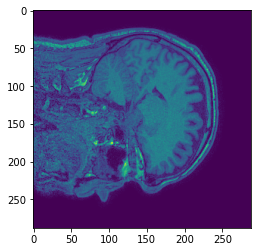

In [ ]:
## The image is stored as 2d images in a 3d collection of images
## Thus when you access the 1st one it it [0,:,:]
## The : means get all data from this dimension
plt.imshow(data[60, :, :])

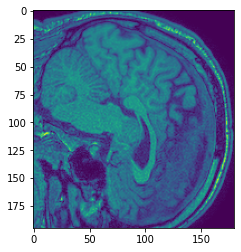

In [ ]:
## Working on selecting out some of the background
plt.imshow(data[80,25:220,70:250])

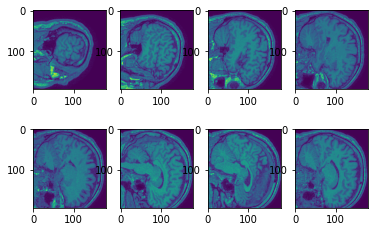

In [ ]:
## Working on seeing more than one image in the plot
fig, axes = plt.subplots(ncols=4,nrows=2)

axes[0][0].imshow(data[20,25:220,70:250])
axes[0][1].imshow(data[30,25:220,70:250])
axes[0][2].imshow(data[40,25:220,70:250])
axes[0][3].imshow(data[50,25:220,70:250])
axes[1][0].imshow(data[60,25:220,70:250])
axes[1][1].imshow(data[70,25:220,70:250])
axes[1][2].imshow(data[80,25:220,70:250])
axes[1][3].imshow(data[90,25:220,70:250])


fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


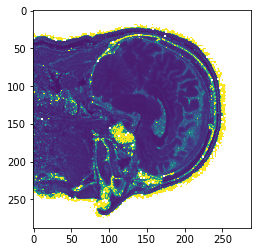

In [ ]:
##Attmepting a mask
first_mask_data = 1/data
plt.imshow(first_mask_data[82,:,:], vmin=0, vmax=0.01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


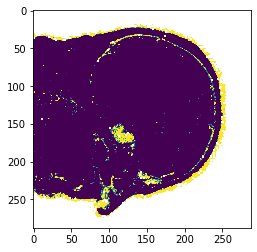

In [ ]:
##Finding a range of brightness
second_mask_data = 1/data
plt.imshow(second_mask_data[82,:,:], vmin=0.005, vmax=0.01)

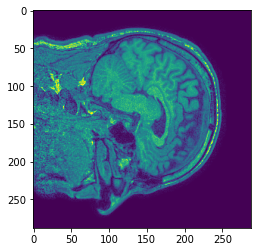

In [ ]:
##More
second_mask_data = data/2
plt.imshow(second_mask_data[82,:,:], vmin=0, vmax=1000)

In [ ]:
pip install bids


In [ ]:
pip install nilearn

     |████████████████████████████████| 10.0 MB 4.5 MB/s 


In [ ]:
## We can use the nibabel viewer

%matplotlib notebook
brain_img.orthoview()

<IPython.core.display.Javascript object>

<OrthoSlicer3D: CC0002_philips_15_56_M.nii (150, 288, 288)>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
TypeError: _cleanup() takes 1 positional argument but 2 were given
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
TypeError: _cleanup() takes 1 positional argument but 2 were given


In [ ]:
## This is information which relates the image to to s place in space
## Gives you some info on "where" the head is and how it is positioned
affine = brain_img.affine
affine

array([[   1.        ,    0.        ,    0.        ,  -77.32167053],
       [   0.        ,    0.8888889 ,    0.        , -111.63430786],
       [   0.        ,    0.        ,    0.8888889 , -133.69812012],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [ ]:
header = brain_img.header['pixdim']
header

array([1.       , 1.       , 0.8888889, 0.8888889, 0.006984 , 0.       ,
       0.       , 0.       ], dtype=float32)

In [ ]:
x, y, z, _ = np.linalg.pinv(affine).dot(np.array([0,0,0,1])).astype(int)

print("Affine")
print(affine)
print("Center: ({:d}, {:d}, {:d})".format(x, y, z))

Affine
[[   1.            0.            0.          -77.32167053]
 [   0.            0.8888889     0.         -111.63430786]
 [   0.            0.            0.8888889  -133.69812012]
 [   0.            0.            0.            1.        ]]
Center: (77, 125, 150)


In [ ]:
nib.aff2axcodes(affine)

('R', 'A', 'S')

In [ ]:
nib.affines.voxel_sizes(affine)

array([1.       , 0.8888889, 0.8888889])

### This is the start of more manipulating

In [ ]:
brain_img.affine

array([[   1.        ,    0.        ,    0.        ,  -77.32167053],
       [   0.        ,    0.8888889 ,    0.        , -111.63430786],
       [   0.        ,    0.        ,    0.8888889 , -133.69812012],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [ ]:
## Placing the voxel onto the epicenter grid
scaling_affine = np.array([[3, 0, 0, 0],
                          [0, 3, 0, 0],
                          [0, 0, 3, 0],
                          [0, 0, 0, 1]])

In [ ]:
## Making the affine easier to deal with
M = brain_img.affine[:3, :3]
abc = brain_img.affine[:3, 3]

In [ ]:
def f(i, j, k):
   """ Return X, Y, Z coordinates for i, j, k """
   return M.dot([i, j, k]) + abc

In [ ]:
brain_img_vox_center = (np.array(data.shape) - 1) / 2.
f(brain_img_vox_center[0], brain_img_vox_center[1], brain_img_vox_center[2])

array([-2.82167053, 15.92124864, -6.14256361])

In [ ]:
from nibabel.affines import apply_affine
apply_affine(brain_img.affine, brain_img_vox_center)

array([-2.82167053, 15.92124864, -6.14256361])

In [ ]:
## Put the voxel grid on the isocenter cooridnate system
scaling_affine = np.array([[3, 0, 0, 0],
                           [0, 3, 0, 0],
                           [0, 0, 3, 0],
                           [0, 0, 0, 1]])

In [ ]:
one_vox_axis_0 = [1, 0, 0]
apply_affine(scaling_affine, one_vox_axis_0)

array([3, 0, 0])

In [ ]:
## Rotating on 1st Axis by 0.3 radians
cos_gamma = np.cos(0.3)
sin_gamma = np.sin(0.3)
rotation_affine = np.array([[1, 0, 0, 0],
                           [0, cos_gamma, -sin_gamma, 0],
                           [0, sin_gamma, cos_gamma, 0],
                           [0, 0, 0, 1]])
intermediate_affine = rotation_affine.dot(scaling_affine)
intermediate_affine

array([[ 3.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.86600947, -0.88656062,  0.        ],
       [ 0.        ,  0.88656062,  2.86600947,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [ ]:
## Translate to center it
translation_affine = np.array([[1, 0, 0, -77.32167053],
                               [0, 1, 0, -111.63430786],
                               [0, 0, 1, -133.69812012],
                               [0, 0, 0, 1]])
final_affine = translation_affine.dot(affine_so_far)
final_affine

array([[   3.        ,    0.        ,    0.        ,  -77.32167053],
       [   0.        ,    2.86600947,   -0.88656062, -111.63430786],
       [   0.        ,    0.88656062,    2.86600947, -133.69812012],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [ ]:
nib.aff2axcodes(affine)

('R', 'A', 'S')

### This means that the coordinate system is:
###[1st axis = left(negative) to right(positive),
###2nd axis = post(negative) to anter(postive),
###3rd axis = infer(negative) to super(positive)]

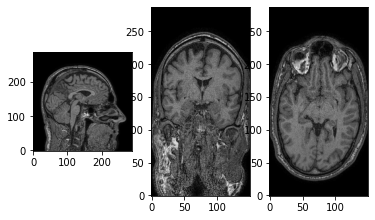

In [ ]:
%matplotlib inline
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

new_data = brain_img.get_fdata()
show_slices([new_data[75, :, :],
             new_data[:, 144, :],
             new_data[:, :, 144]])

In [ ]:

new_data.shape


(150, 288, 288)